<h2 style='color:blue' align='center'>Transfer learning in image classification</h2>

**In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand**

In [1]:
# Install tensorflow_hub using pip install tensorflow_hub first

In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Make predictions using ready made model (without any training)**

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


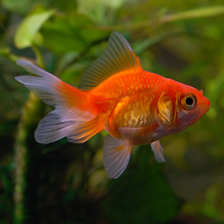

In [4]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [7]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 2s 2s/step


(1, 1001)

In [8]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [9]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [10]:
image_labels[predicted_label_index]

'goldfish'

<h3 style='color:purple'>Load flowers dataset</h3>

In [11]:
!pwd

/content


In [12]:
data_dir = '/content/nails'

In [13]:
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# # cache_dir indicates where to download data. I specified . which means current directory
# # untar true will unzip it

In [14]:
data_dir

'/content/nails'

In [15]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/nails')

In [16]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/nails/psoriasis/psoriasis-27.jpg'),
 PosixPath('/content/nails/psoriasis/psoriasis-14.jpg'),
 PosixPath('/content/nails/psoriasis/psoriasis-168.jpg'),
 PosixPath('/content/nails/psoriasis/psoriasis-18.jpg'),
 PosixPath('/content/nails/psoriasis/psoriasis-152.jpg')]

In [17]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

631


In [18]:
psoriasis = list(data_dir.glob('psoriasis/*'))
psoriasis[:5]

[PosixPath('/content/nails/psoriasis/psoriasis-27.jpg'),
 PosixPath('/content/nails/psoriasis/psoriasis-14.jpg'),
 PosixPath('/content/nails/psoriasis/psoriasis-168.jpg'),
 PosixPath('/content/nails/psoriasis/psoriasis-18.jpg'),
 PosixPath('/content/nails/psoriasis/psoriasis-152.jpg')]

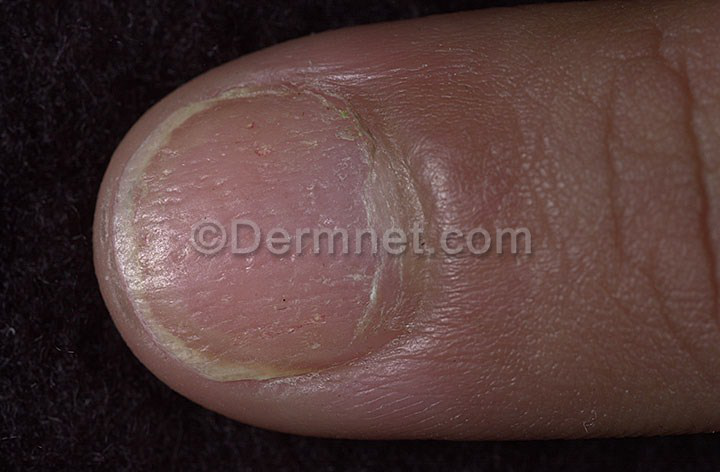

In [19]:
Image.open(str(psoriasis[1]))

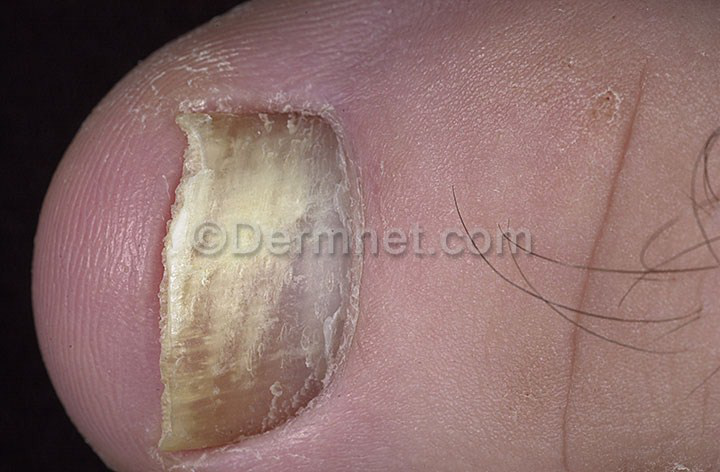

In [20]:
distal_subungual_onychomycosis = list(data_dir.glob('distal-subungual-onychomycosis/*'))
Image.open(str(distal_subungual_onychomycosis[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [21]:
nails_images_dict = {
    'psoriasis': list(data_dir.glob('psoriasis/*')),
    'distal-subungual-onychomycosis': list(data_dir.glob('distal-subungual-onychomycosis/*')),
    'mucous-cyst': list(data_dir.glob('mucous-cyst/*')),
    'healthy': list(data_dir.glob('healthy/*')),
}

In [22]:
nails_labels_dict = {
    'psoriasis': 0,
    'distal-subungual-onychomycosis': 1,
    'mucous-cyst': 2,
    'healthy': 3,
}

{'psoriasis': 0, 'distal-subungual-onychomycosis': 1, 'mucous-cyst': 2, 'healthy': 3}


In [23]:
nails_images_dict['psoriasis'][:5]

[PosixPath('/content/nails/psoriasis/psoriasis-27.jpg'),
 PosixPath('/content/nails/psoriasis/psoriasis-14.jpg'),
 PosixPath('/content/nails/psoriasis/psoriasis-168.jpg'),
 PosixPath('/content/nails/psoriasis/psoriasis-18.jpg'),
 PosixPath('/content/nails/psoriasis/psoriasis-152.jpg')]

In [24]:
str(nails_images_dict['psoriasis'][0])

'/content/nails/psoriasis/psoriasis-27.jpg'

In [25]:
img = cv2.imread(str(nails_images_dict['psoriasis'][0]))

In [26]:
img.shape

(472, 720, 3)

In [27]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [43]:
X, y = [], []

for nail_condition, images in nails_images_dict.items():
    for image in images:
        # print('image: ' + str(image))
        img = cv2.imread(str(image))
        # print('img: ' + str(img))
        try:
          resized_img = cv2.resize(img,(224,224))
        except Exception as e:
          print('image: ' + str(image))
          print('img: ' + str(img))
        X.append(resized_img)
        y.append(nails_images_dict[nail_condition])

image: /content/nails/mucous-cyst/.ipynb_checkpoints
img: None


In [45]:
X = np.array(X)
# X = np.asarray(X).astype(np.float32)

print('X: ' + str(X.shape))
y = np.array(y)
print('y: ' + str(y.shape))

X: (632, 224, 224, 3)
y: (632,)


<h3 style='color:purple'>Train test split</h3>

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
print('y_train: ' + str(len(y_train)) + ' ' + str(y_train.shape))

y_train: 474 (474,)


<h3 style='color:purple'>Preprocessing: scale images</h3>

In [47]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

**Make prediction using pre-trained model on new flowers dataset**

In [48]:
X[0].shape

(224, 224, 3)

In [49]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [51]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
# print(str(x0_resized.shape))
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

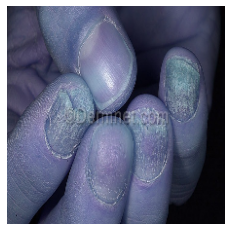

In [52]:
plt.axis('off')
plt.imshow(X[0])

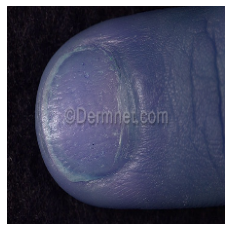

In [53]:
plt.axis('off')
plt.imshow(X[1])

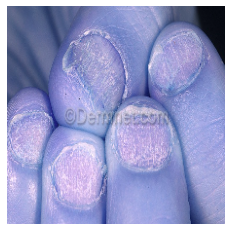

In [54]:
plt.axis('off')
plt.imshow(X[2])

In [55]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 3s 3s/step


array([795, 550, 795])

In [56]:
image_labels[795]

'shower curtain'

<h3 style='color:purple'>Now take pre-trained model and retrain it using flowers images</h3>

In [57]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [58]:
num_of_conditions = 4

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_conditions)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [80]:
print(str(type(y_train)))
for i in range(len(y_train)):
  if 'psoriasis' in str(y_train[i]):
    y_train[i] = 0
  elif "distal-subungual-onychomycosis" in str(y_train[i]):
    y_train[i] = 1
  elif "mucous-cyst" in str(y_train[i]):
    y_train[i] = 2
  elif "healthy" in str(y_train[i]):
    y_train[i] = 3
  else:
    print('y_train[i]: ' + str(y_train[i]))

y_train

<class 'numpy.ndarray'>
y_train[i]: 0
y_train[i]: 1
y_train[i]: 3
y_train[i]: 0
y_train[i]: 0
y_train[i]: 3
y_train[i]: 3
y_train[i]: 3
y_train[i]: 2
y_train[i]: 3
y_train[i]: 1
y_train[i]: 3
y_train[i]: 0
y_train[i]: 0
y_train[i]: 2
y_train[i]: 2
y_train[i]: 0
y_train[i]: 2
y_train[i]: 1
y_train[i]: 0
y_train[i]: 3
y_train[i]: 0
y_train[i]: 2
y_train[i]: 1
y_train[i]: 3
y_train[i]: 1
y_train[i]: 0
y_train[i]: 0
y_train[i]: 2
y_train[i]: 2
y_train[i]: 3
y_train[i]: 2
y_train[i]: 3
y_train[i]: 2
y_train[i]: 3
y_train[i]: 2
y_train[i]: 3
y_train[i]: 1
y_train[i]: 1
y_train[i]: 3
y_train[i]: 1
y_train[i]: 1
y_train[i]: 1
y_train[i]: 1
y_train[i]: 1
y_train[i]: 1
y_train[i]: 0
y_train[i]: 1
y_train[i]: 0
y_train[i]: 3
y_train[i]: 3
y_train[i]: 1
y_train[i]: 1
y_train[i]: 2
y_train[i]: 1
y_train[i]: 1
y_train[i]: 1
y_train[i]: 1
y_train[i]: 3
y_train[i]: 1
y_train[i]: 1
y_train[i]: 3
y_train[i]: 0
y_train[i]: 3
y_train[i]: 2
y_train[i]: 0
y_train[i]: 0
y_train[i]: 3
y_train[i]: 3
y_train[i]

array([0, 1, 3, 0, 0, 3, 3, 3, 2, 3, 1, 3, 0, 0, 2, 2, 0, 2, 1, 0, 3, 0,
       2, 1, 3, 1, 0, 0, 2, 2, 3, 2, 3, 2, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 3, 3, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 3, 0, 3, 2, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 0, 2, 3, 0, 1, 0, 3, 1, 3,
       0, 2, 1, 2, 2, 3, 0, 0, 3, 1, 3, 0, 3, 2, 3, 3, 3, 0, 3, 2, 1, 2,
       0, 2, 1, 0, 0, 2, 1, 3, 2, 3, 3, 3, 0, 2, 0, 1, 3, 1, 0, 1, 0, 1,
       1, 3, 3, 2, 3, 3, 1, 3, 2, 2, 3, 3, 3, 1, 0, 2, 1, 1, 3, 1, 3, 2,
       3, 1, 0, 2, 3, 3, 0, 2, 3, 1, 3, 1, 2, 3, 0, 0, 1, 0, 3, 2, 3, 3,
       0, 2, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 2, 0, 3, 2, 3, 3, 3,
       1, 0, 2, 1, 3, 3, 3, 3, 1, 2, 1, 0, 1, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 3, 1, 2, 1, 2, 0, 3, 2, 0, 2, 3, 2, 3, 0, 2, 3, 1, 1, 3, 0, 1,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 2, 1,
       2, 3, 0, 3, 3, 0, 3, 3, 3, 2, 3, 0, 1, 1, 3, 2, 3, 3, 1, 3, 0, 1,
       3, 0, 3, 0, 2, 1, 3, 0, 2, 2, 0, 2, 3, 0, 3,

In [90]:
for i in range(len(y_test)):
  if 'psoriasis' in str(y_test[i]):
    y_test[i] = 0
  elif "distal-subungual-onychomycosis" in str(y_test[i]):
    y_test[i] = 1
  elif "mucous-cyst" in str(y_test[i]):
    y_test[i] = 2
  elif "healthy" in str(y_test[i]):
    y_test[i] = 3
  else:
    print('y_test[i]: ' + str(y_test[i]))

y_test

array([3, 1, 3, 3, 3, 3, 3, 3, 1, 2, 2, 0, 2, 3, 2, 1, 0, 3, 0, 2, 3, 0,
       3, 3, 0, 2, 2, 3, 0, 3, 3, 1, 3, 2, 3, 0, 3, 3, 1, 1, 2, 3, 0, 3,
       3, 3, 3, 1, 0, 2, 2, 1, 1, 2, 3, 0, 0, 0, 3, 2, 1, 1, 3, 3, 3, 2,
       3, 2, 3, 0, 3, 3, 3, 2, 0, 3, 3, 3, 1, 0, 3, 3, 0, 3, 3, 3, 2, 3,
       1, 0, 1, 3, 0, 3, 3, 3, 1, 1, 2, 0, 0, 1, 3, 1, 0, 3, 2, 3, 0, 1,
       3, 3, 3, 3, 1, 2, 3, 3, 1, 2, 3, 1, 3, 1, 1, 0, 1, 3, 1, 0, 3, 3,
       3, 3, 3, 1, 0, 0, 3, 3, 0, 3, 3, 3, 2, 1, 3, 2, 2, 0, 1, 1, 2, 3,
       0, 3, 3, 0], dtype=object)

In [91]:
y_test = np.array([np.array(val) for val in y_test])
y_test

array([3, 1, 3, 3, 3, 3, 3, 3, 1, 2, 2, 0, 2, 3, 2, 1, 0, 3, 0, 2, 3, 0,
       3, 3, 0, 2, 2, 3, 0, 3, 3, 1, 3, 2, 3, 0, 3, 3, 1, 1, 2, 3, 0, 3,
       3, 3, 3, 1, 0, 2, 2, 1, 1, 2, 3, 0, 0, 0, 3, 2, 1, 1, 3, 3, 3, 2,
       3, 2, 3, 0, 3, 3, 3, 2, 0, 3, 3, 3, 1, 0, 3, 3, 0, 3, 3, 3, 2, 3,
       1, 0, 1, 3, 0, 3, 3, 3, 1, 1, 2, 0, 0, 1, 3, 1, 0, 3, 2, 3, 0, 1,
       3, 3, 3, 3, 1, 2, 3, 3, 1, 2, 3, 1, 3, 1, 1, 0, 1, 3, 1, 0, 3, 3,
       3, 3, 3, 1, 0, 0, 3, 3, 0, 3, 3, 3, 2, 1, 3, 2, 2, 0, 1, 1, 2, 3,
       0, 3, 3, 0])

In [84]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 224, 224, 3) <dtype: 'float32'>
(None, 4) <dtype: 'float32'>
keras_layer_2 (None, 224, 224, 3) float32
dense_1 (None, 1280) float32


[None, None]

In [85]:
y_train = np.array([np.array(val) for val in y_train])
y_train

array([0, 1, 3, 0, 0, 3, 3, 3, 2, 3, 1, 3, 0, 0, 2, 2, 0, 2, 1, 0, 3, 0,
       2, 1, 3, 1, 0, 0, 2, 2, 3, 2, 3, 2, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 3, 3, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 3, 0, 3, 2, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 0, 2, 3, 0, 1, 0, 3, 1, 3,
       0, 2, 1, 2, 2, 3, 0, 0, 3, 1, 3, 0, 3, 2, 3, 3, 3, 0, 3, 2, 1, 2,
       0, 2, 1, 0, 0, 2, 1, 3, 2, 3, 3, 3, 0, 2, 0, 1, 3, 1, 0, 1, 0, 1,
       1, 3, 3, 2, 3, 3, 1, 3, 2, 2, 3, 3, 3, 1, 0, 2, 1, 1, 3, 1, 3, 2,
       3, 1, 0, 2, 3, 3, 0, 2, 3, 1, 3, 1, 2, 3, 0, 0, 1, 0, 3, 2, 3, 3,
       0, 2, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 2, 0, 3, 2, 3, 3, 3,
       1, 0, 2, 1, 3, 3, 3, 3, 1, 2, 1, 0, 1, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 3, 1, 2, 1, 2, 0, 3, 2, 0, 2, 3, 2, 3, 0, 2, 3, 1, 1, 3, 0, 1,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 2, 1,
       2, 3, 0, 3, 3, 0, 3, 3, 3, 2, 3, 0, 1, 1, 3, 2, 3, 3, 1, 3, 0, 1,
       3, 0, 3, 0, 2, 1, 3, 0, 2, 2, 0, 2, 3, 0, 3,

In [86]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

print('X_train_scaled: '  +' is of shape ' + str(X_train_scaled.shape))
print('y_train: ' +' is of shape ' + str(len(y_train.shape)))
resized_img = cv2.resize(img, (224,224))

# y_train = y_train.reshape(-1)
# y_train = y_train.reshape(, 1)

model.fit(X_train_scaled, y_train, epochs=5)

X_train_scaled:  is of shape (474, 224, 224, 3)
y_train:  is of shape 1
Epoch 1/5
15/15 [==============================] - 23s 1s/step - loss: 1.0627 - acc: 0.5570
Epoch 2/5
15/15 [==============================] - 18s 1s/step - loss: 0.5675 - acc: 0.7743
Epoch 3/5
15/15 [==============================] - 18s 1s/step - loss: 0.3974 - acc: 0.8565
Epoch 4/5
15/15 [==============================] - 17s 1s/step - loss: 0.3208 - acc: 0.9008
Epoch 5/5
15/15 [==============================] - 18s 1s/step - loss: 0.2770 - acc: 0.9114


In [92]:
model.evaluate(X_test_scaled,y_test)

5/5 [==============================] - 6s 1s/step - loss: 0.3111 - acc: 0.8861


[0.31113186478614807, 0.8860759735107422]

In [93]:
model.save('model.h5')

In [94]:
# save the underlying  tensorflow graph
model_file = classifier.to_json()
with open("model.json", "w") as source:
    source.write(model_file)
# save model parameter 
classifier.save_weights("model_weights.h5")